# Clustering

### Importing the Necessary Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.clustering import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [41]:
data = get_data('wholesale')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Exploratory Data Analysis

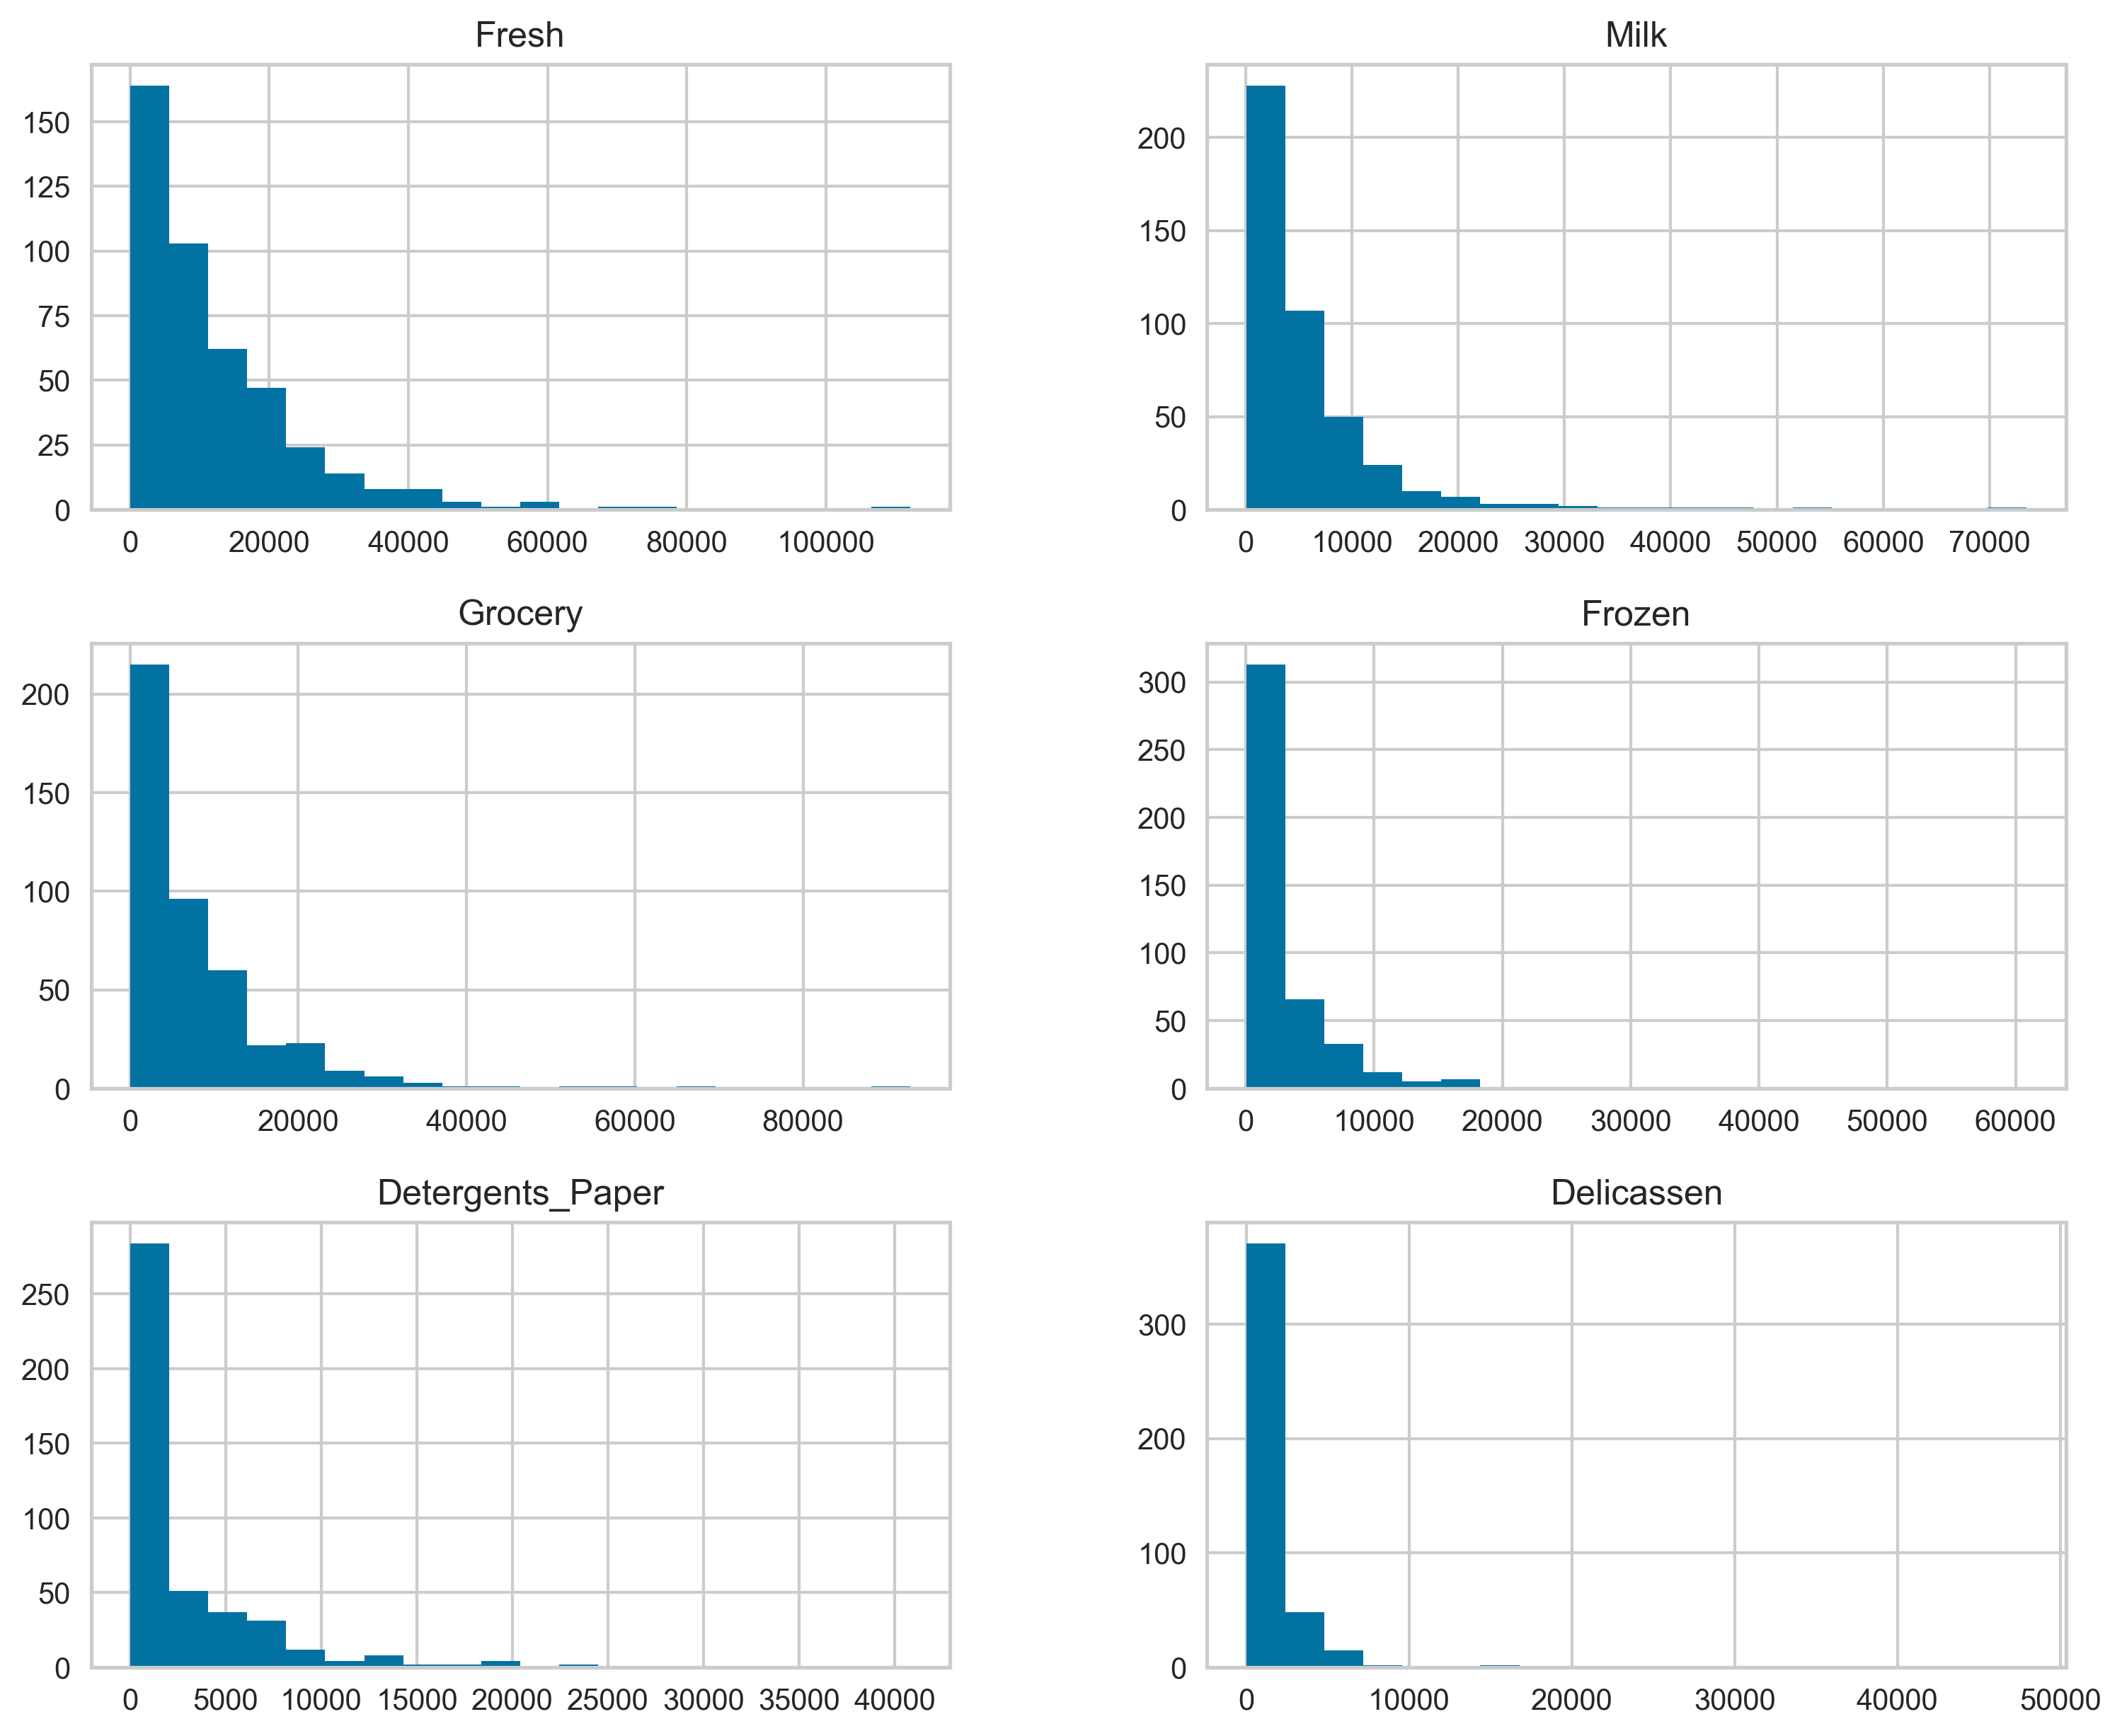

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [43]:
numeric = ['Fresh', 'Milk', 'Grocery', 'Frozen',
           'Detergents_Paper', 'Delicassen']
categorical = ['Channel', 'Region']

data[numeric].hist(bins = 20, figsize = (12,10))
plt.show()

data[numeric].skew()

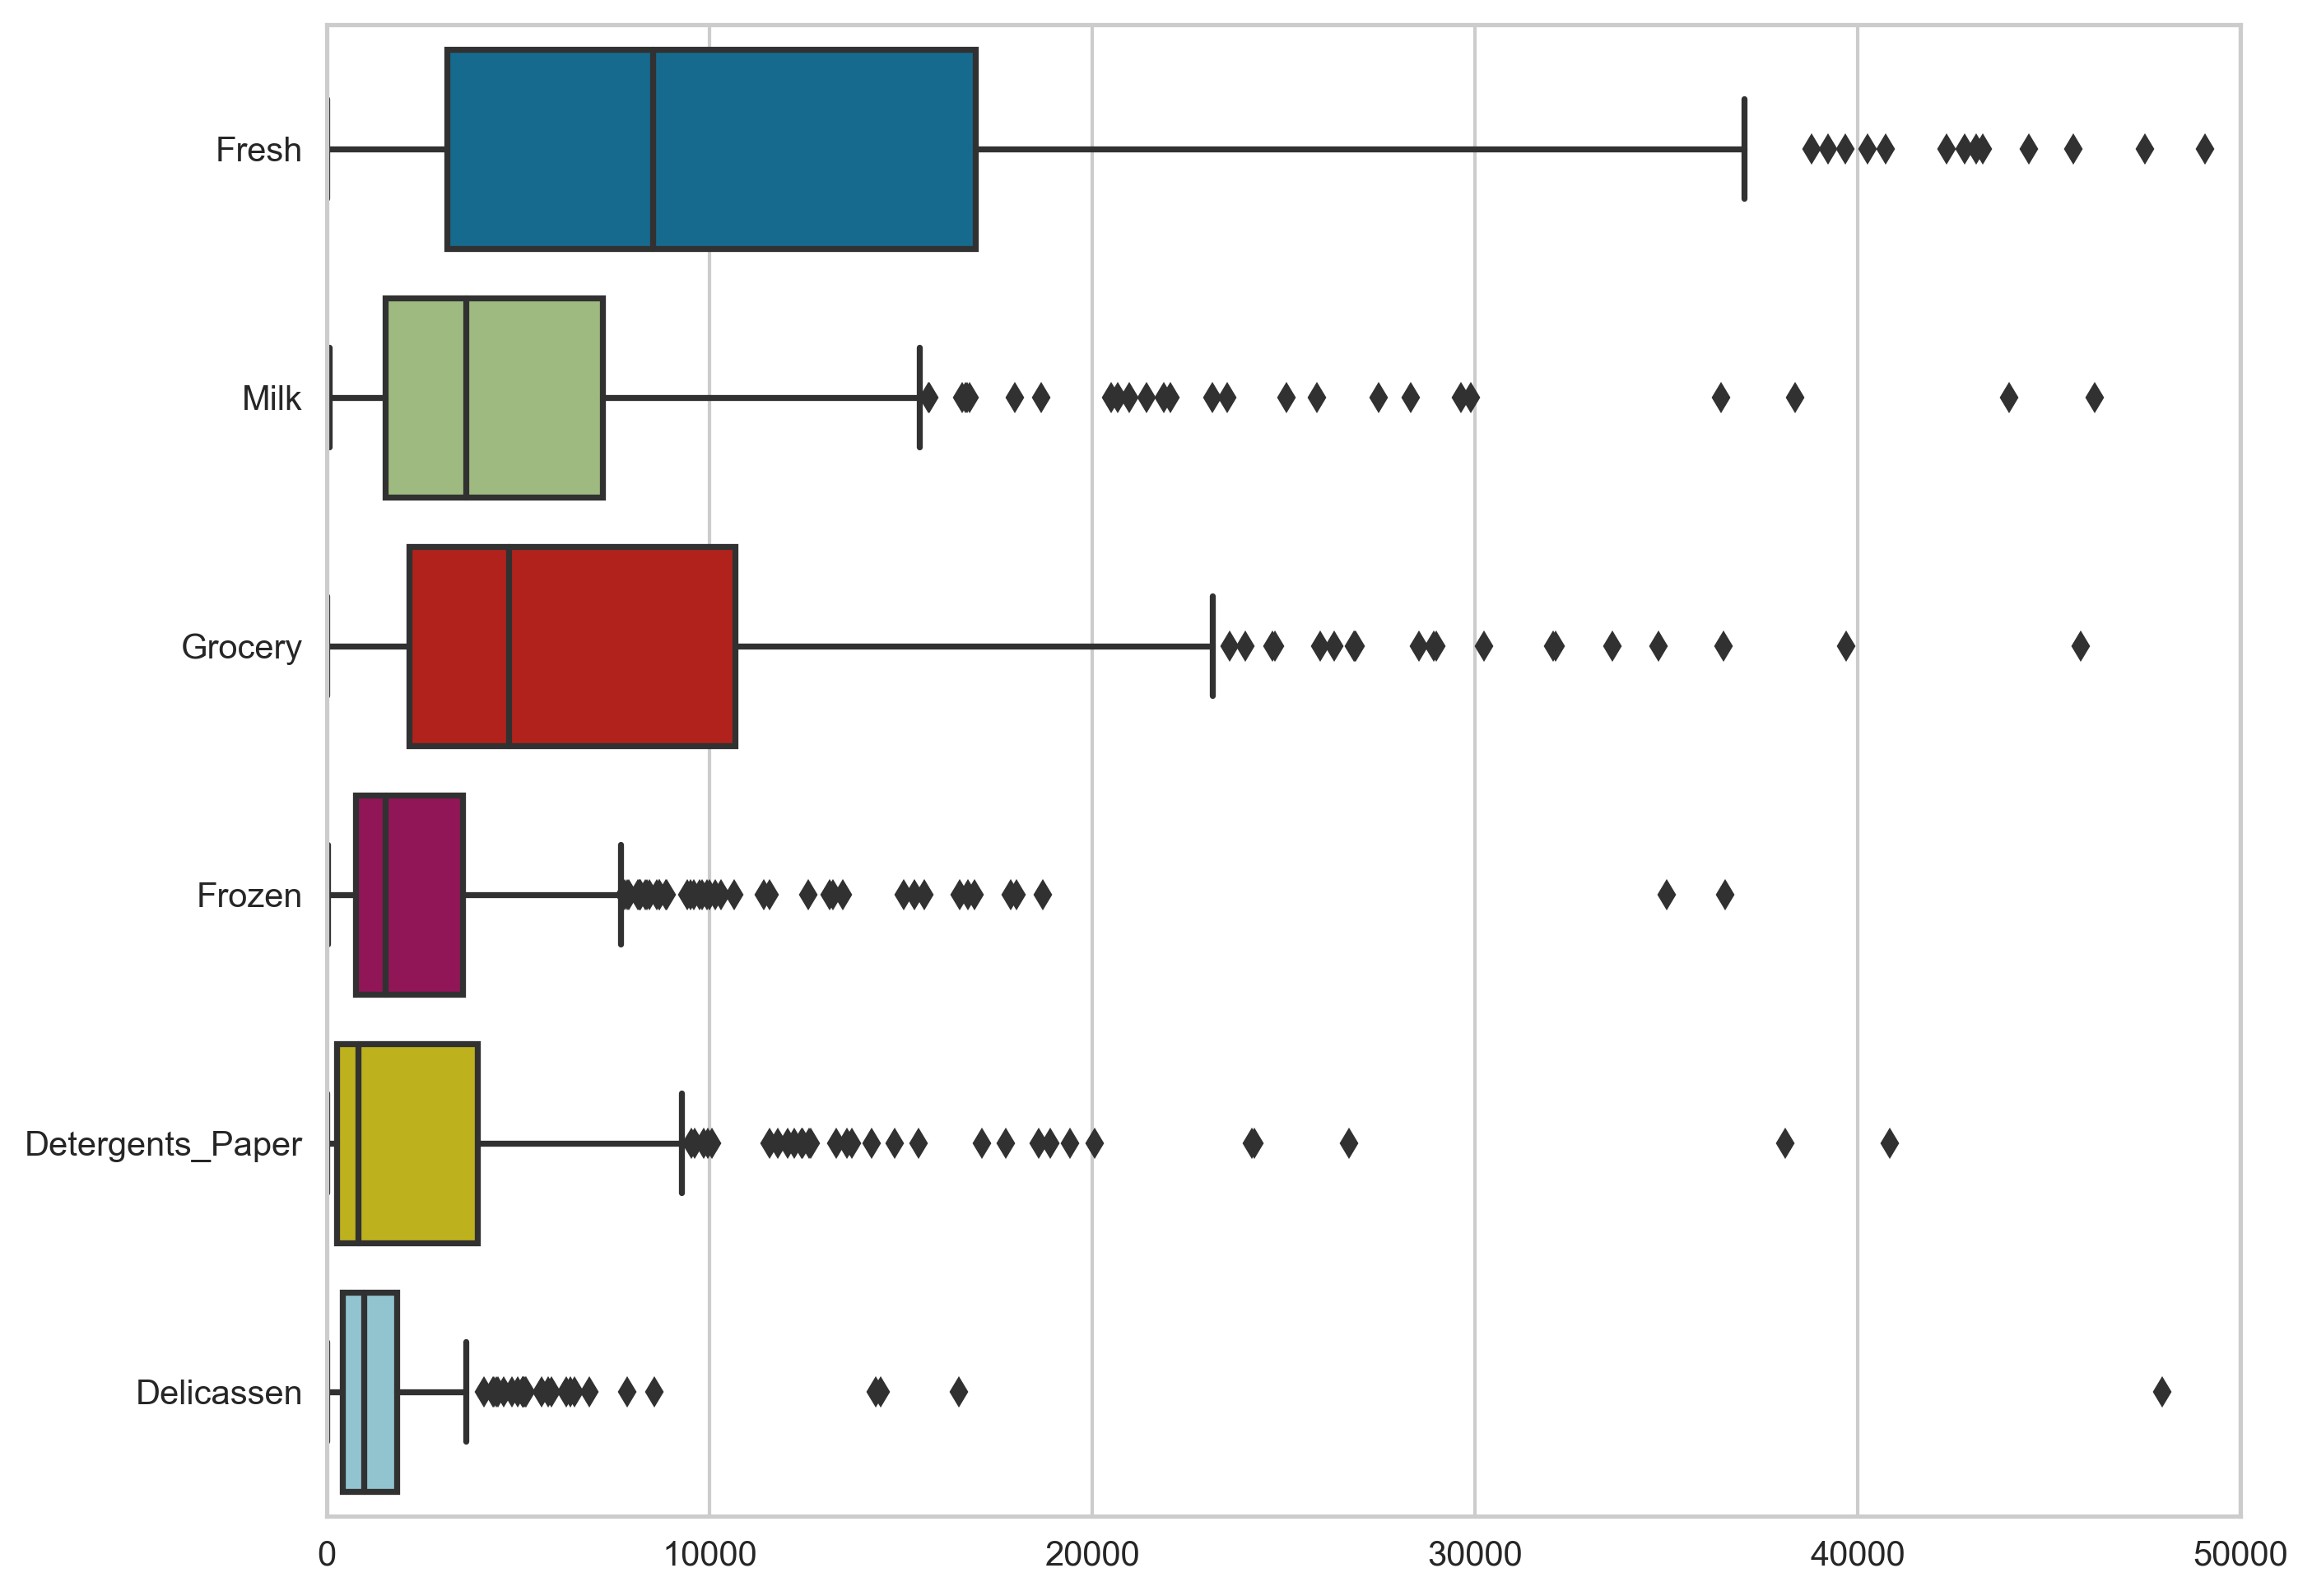

In [53]:
fig, ax  = plt.subplots(figsize = (10, 8))

sns.boxplot(data=data[numeric], orient='h')
ax.set_xlim(0, 50000)

plt.show()

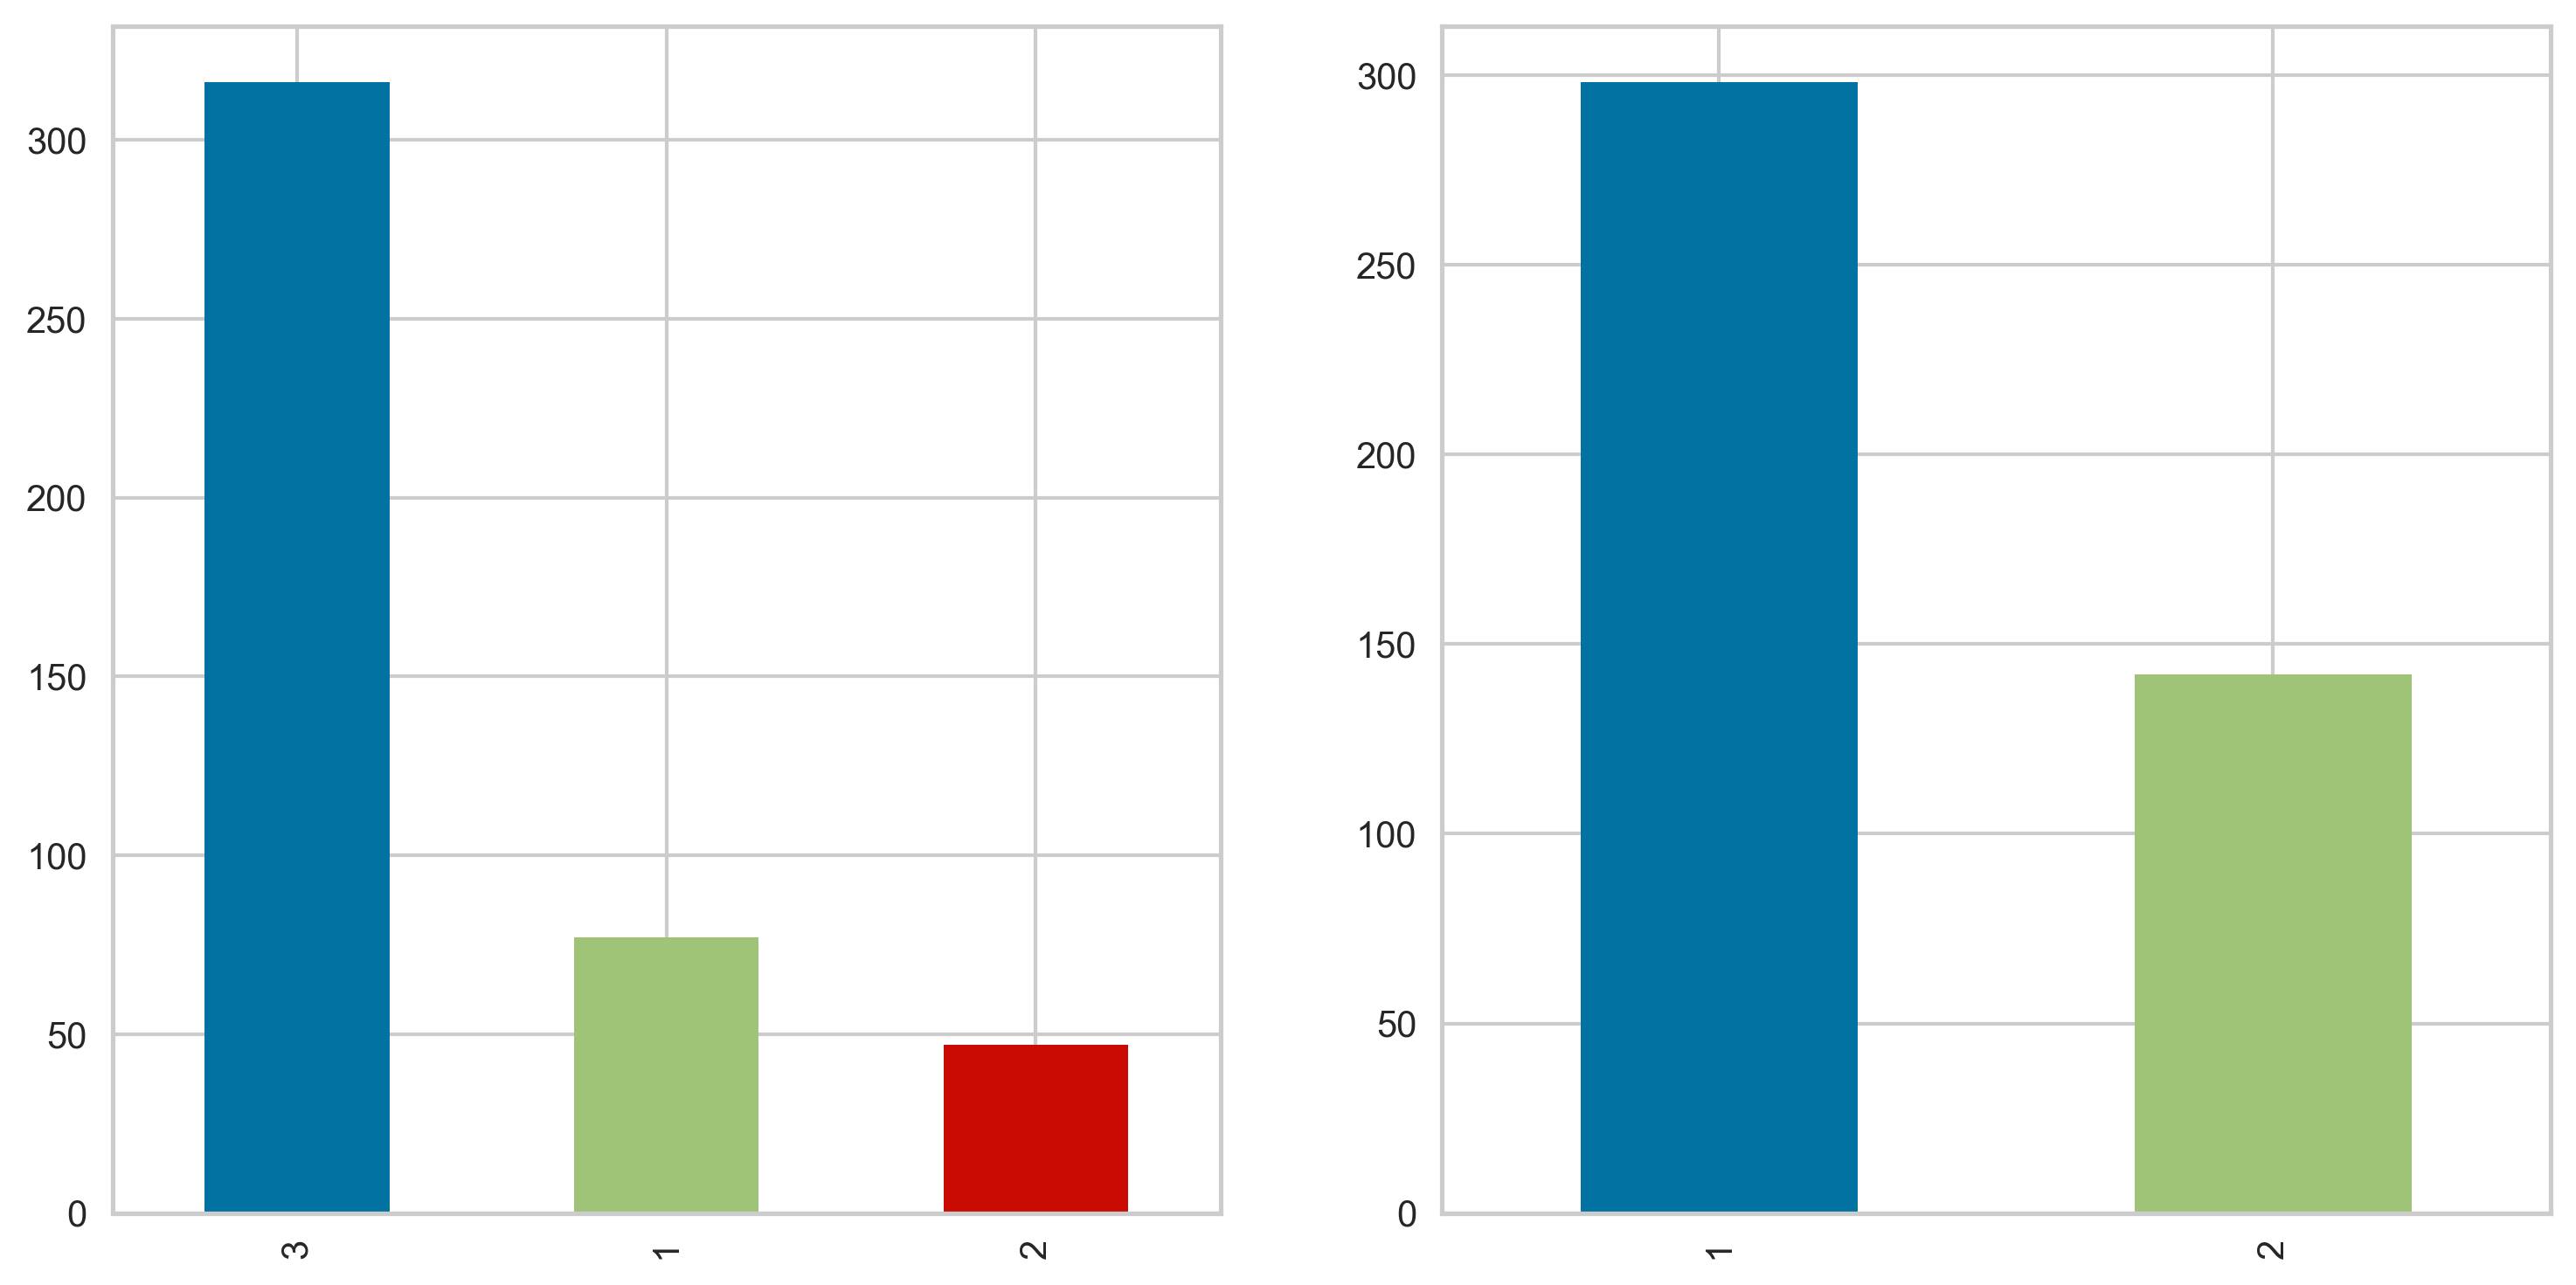

In [60]:
color = ['C0', 'C1', 'C2', 'C3']

fig, ax = plt.subplots(1, 2, figsize=(12,6))

data['Region'].value_counts().plot(kind='bar', color=color, ax=ax[0])
data['Channel'].value_counts().plot(kind='bar', color=color, ax=ax[1])

ax[0].set_label('Region')
ax[1].set_label('Channel')

plt.show()

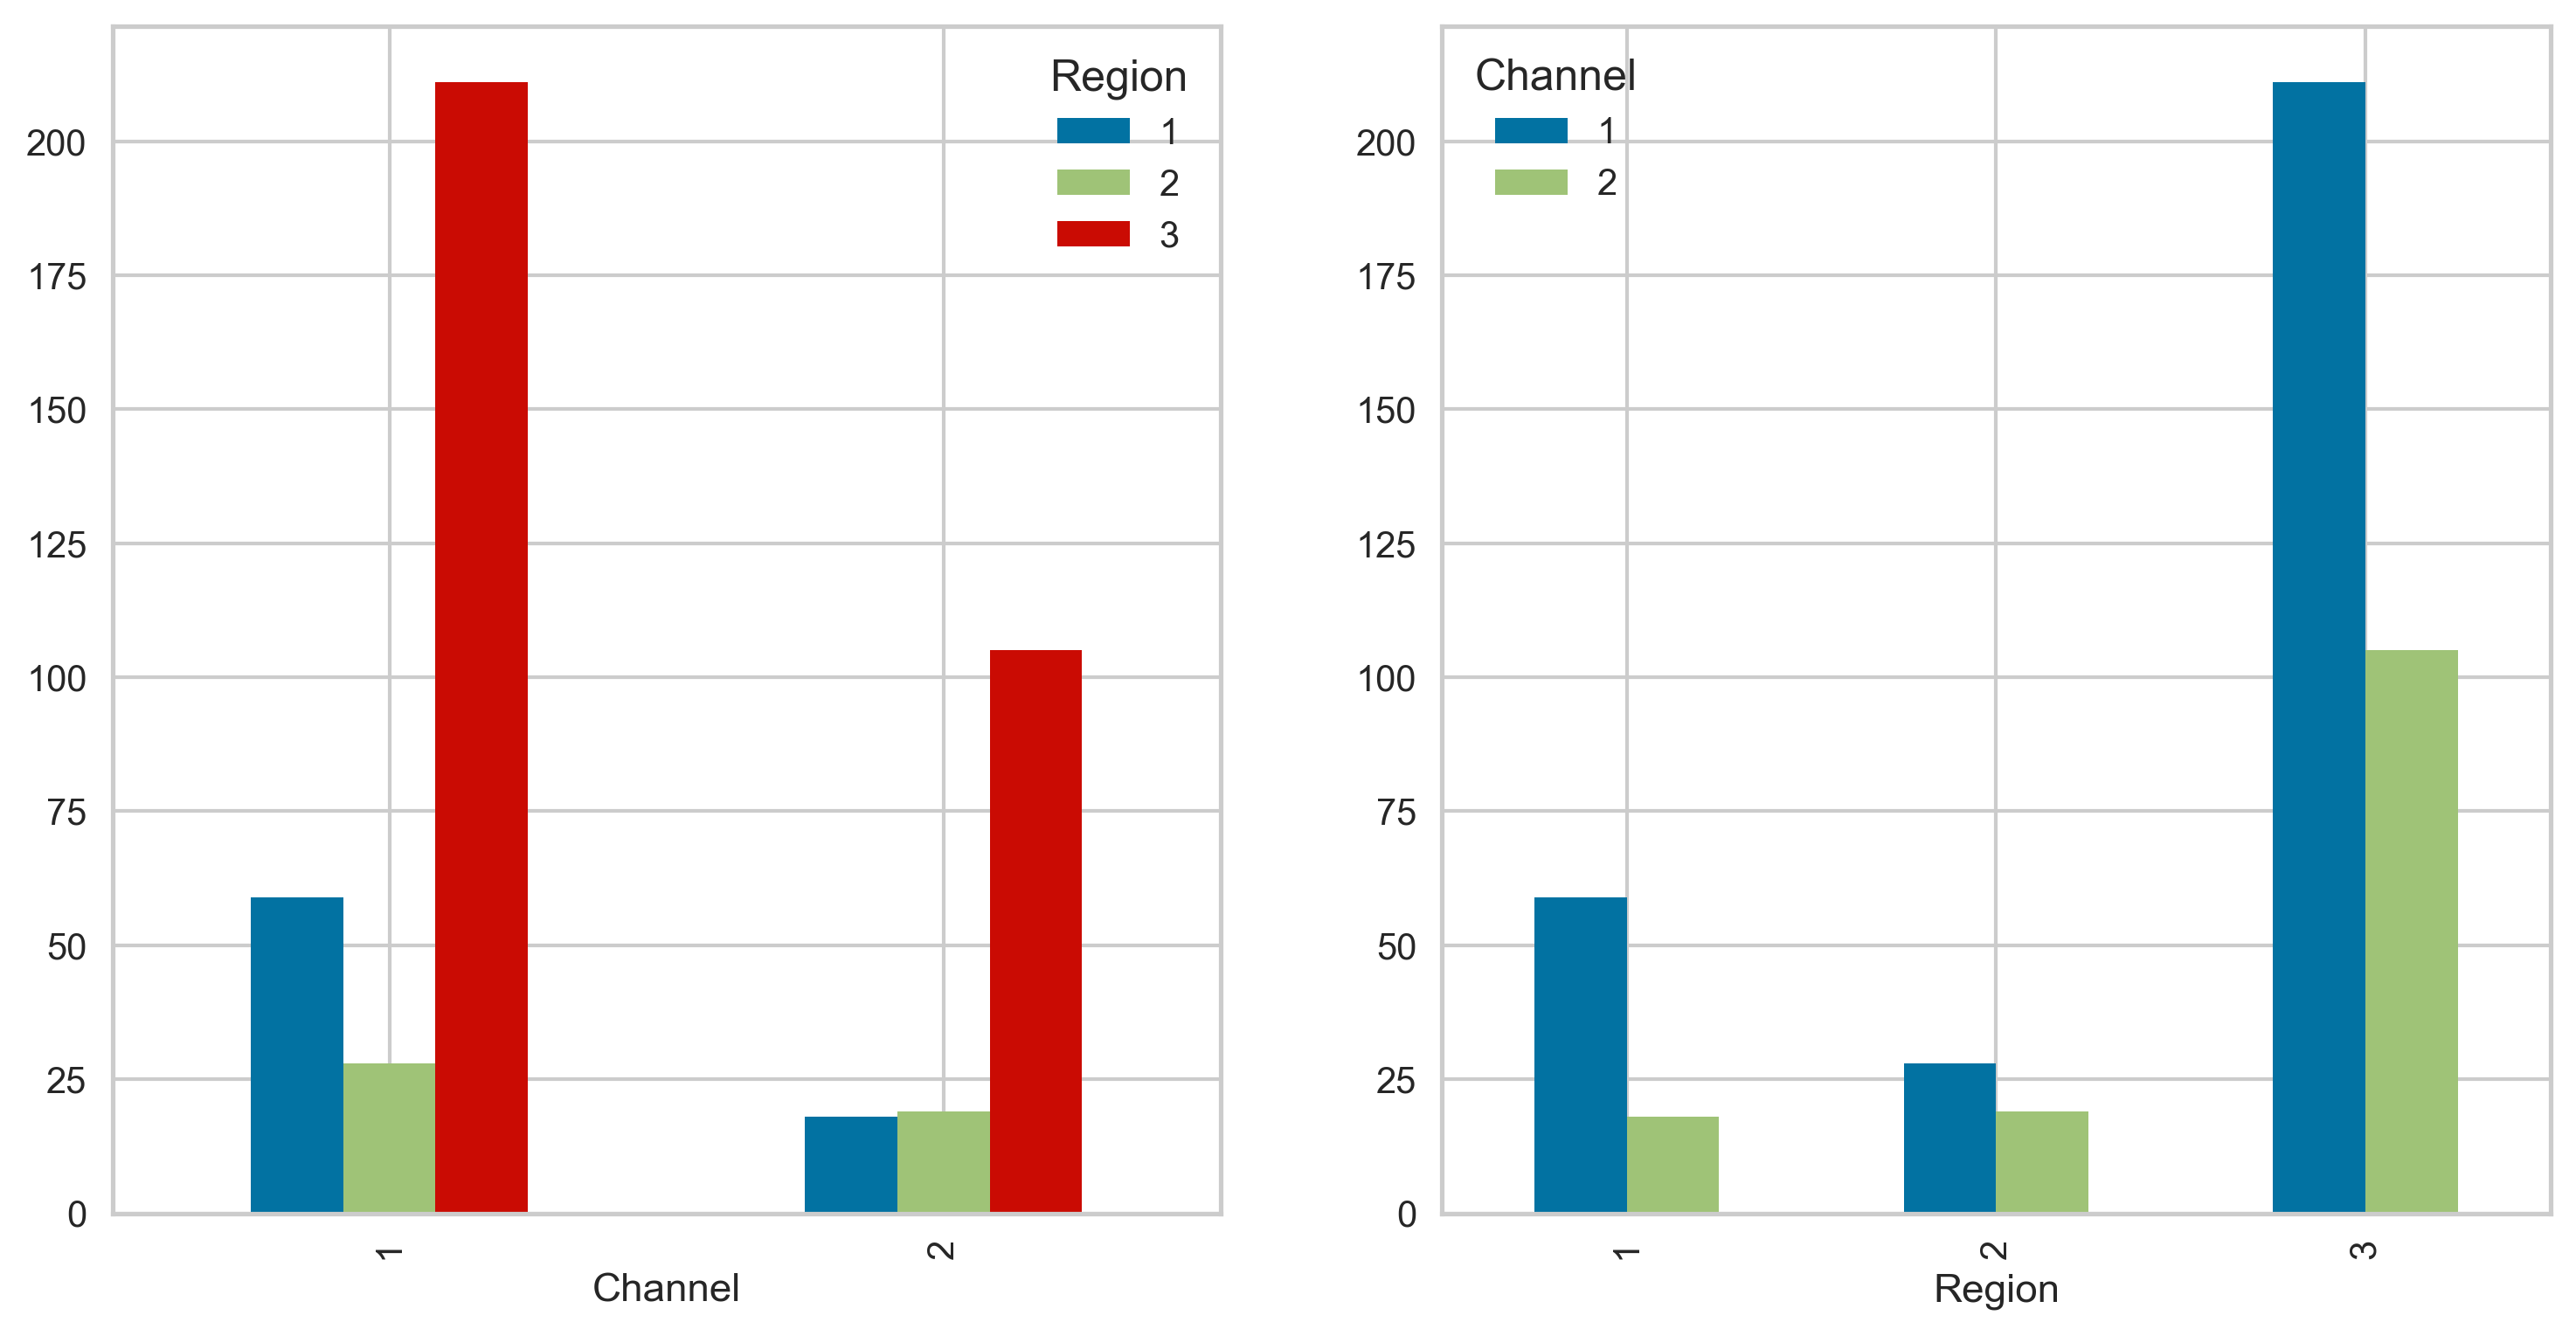

In [47]:
cat = data[categorical]

fig, ax = plt.subplots(1, 2, figsize=(12,6))

cat.groupby(categorical).size().unstack().plot(kind = 'bar', ax=ax[0])
cat.groupby(categorical[::-1]).size().unstack().plot(kind = 'bar', ax=ax[1])
plt.show()

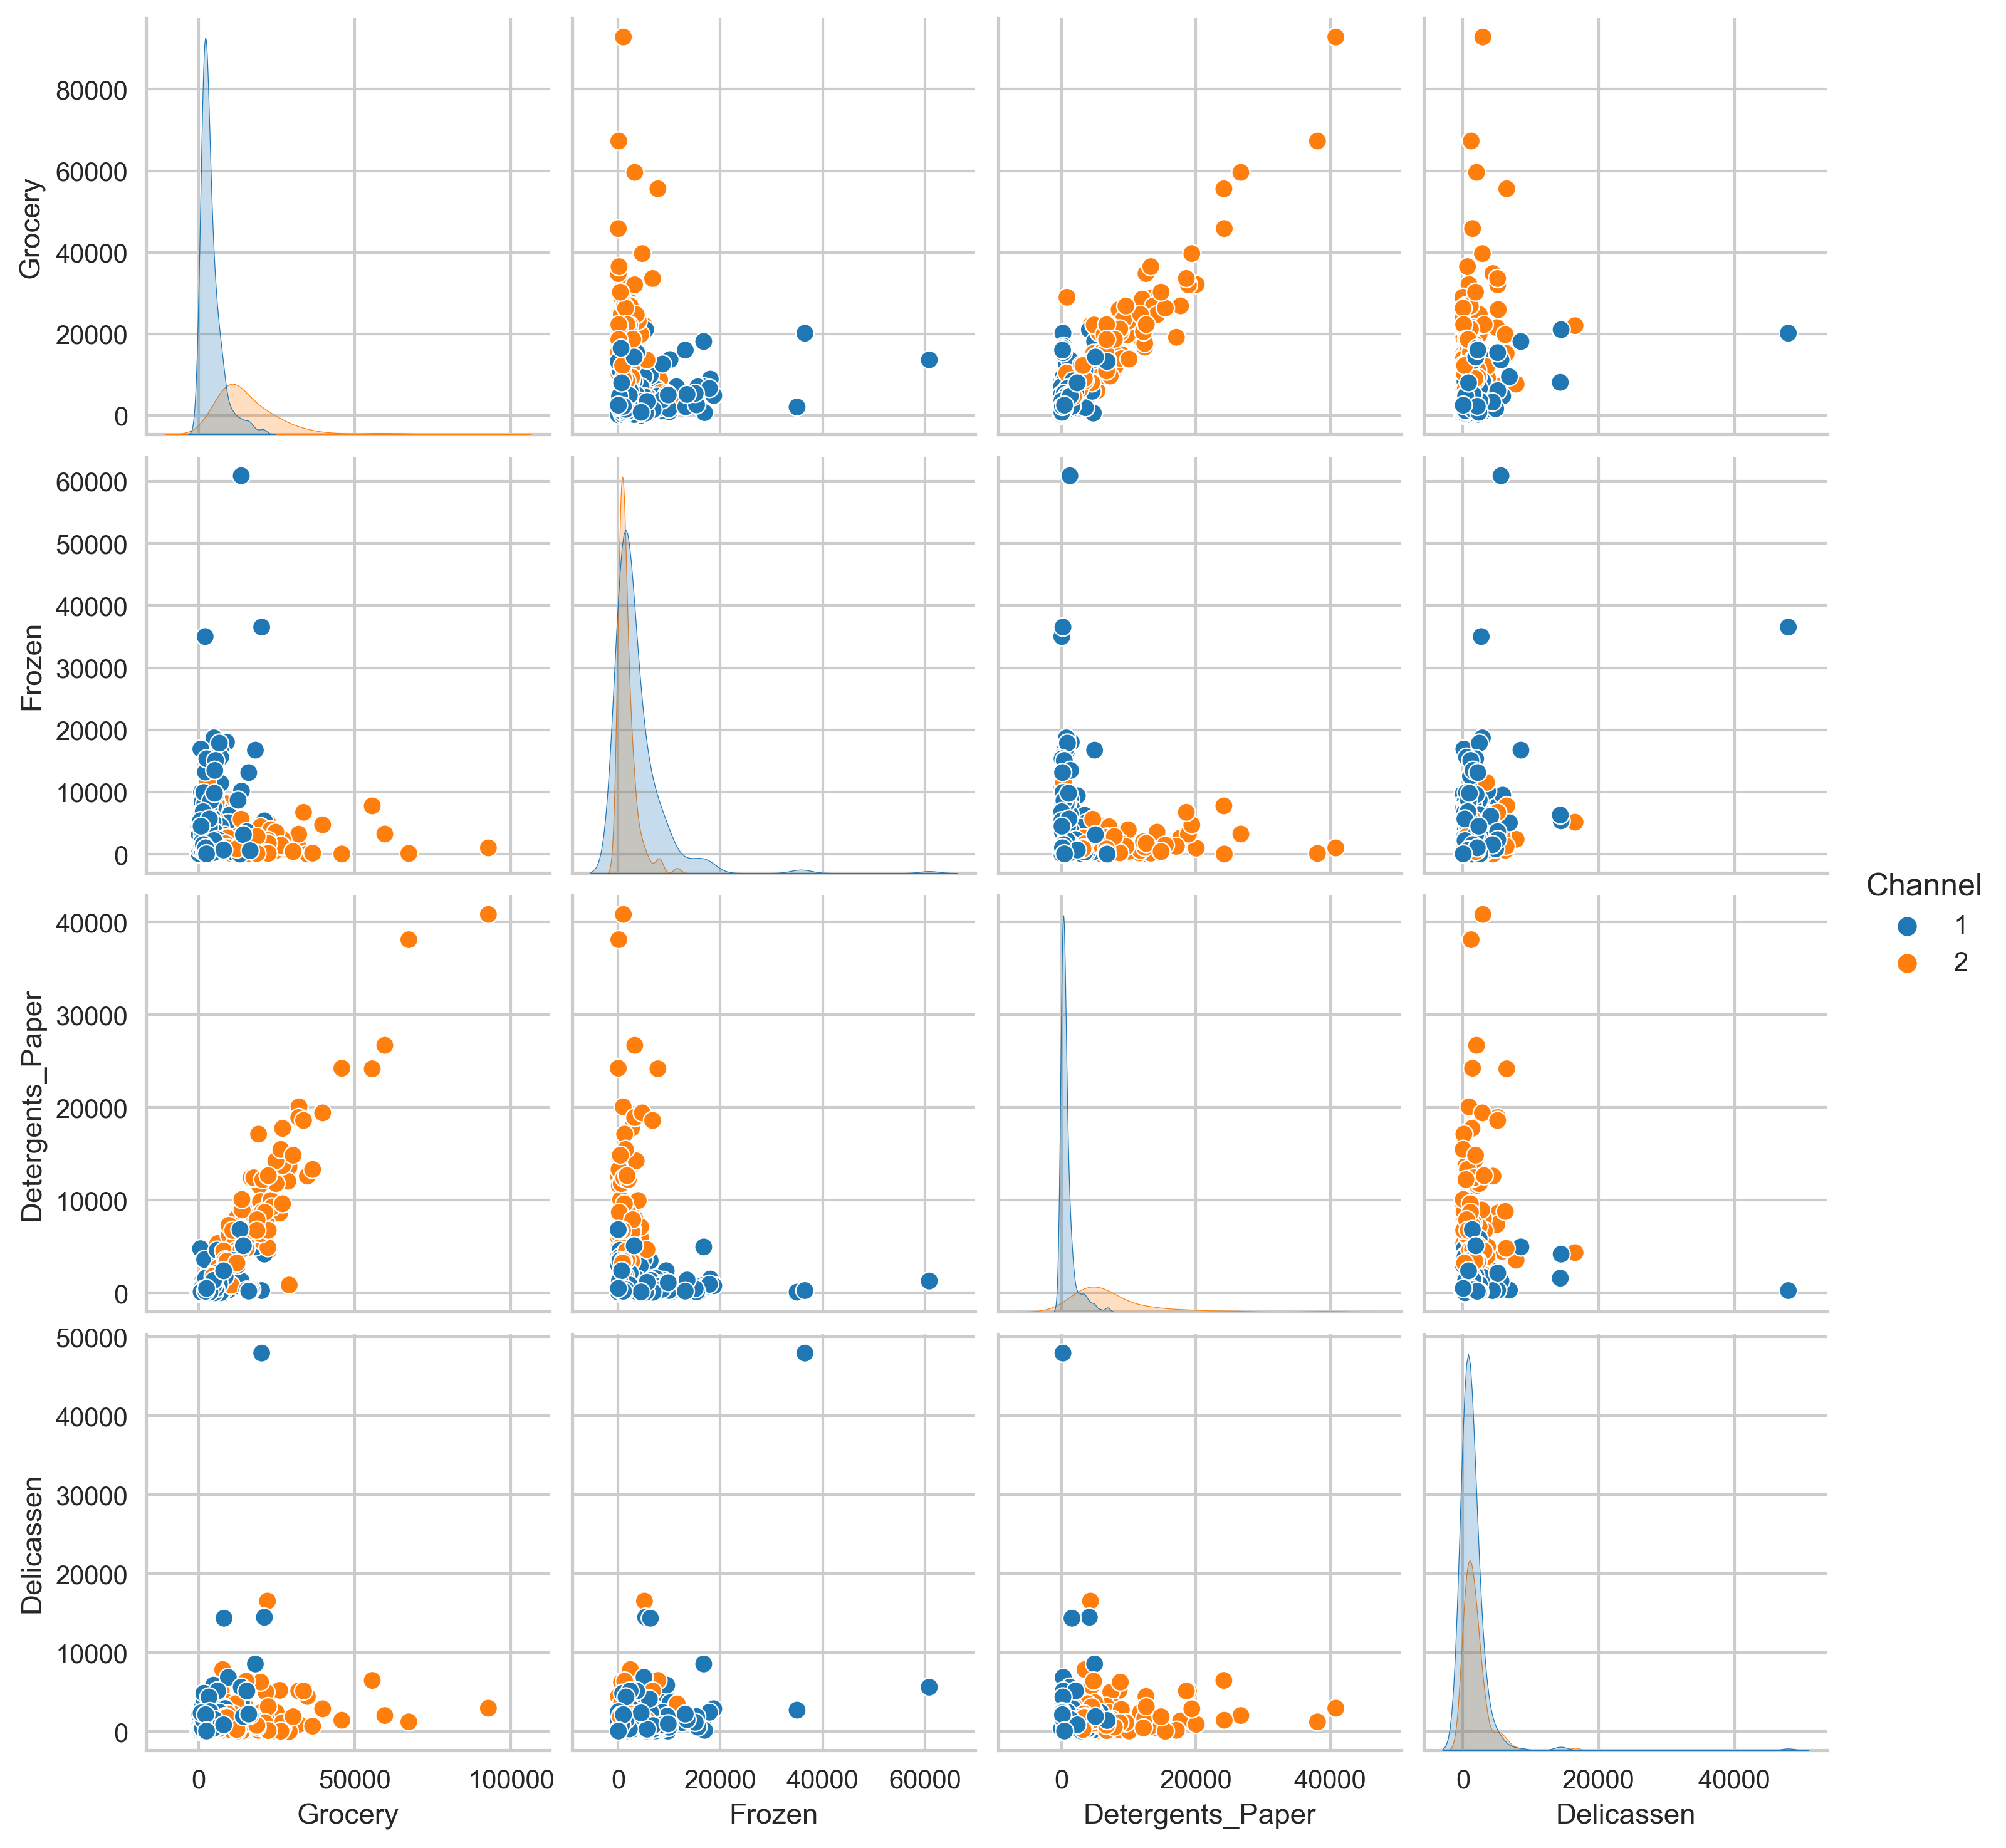

In [55]:
sns.pairplot(data, vars = numeric[2:], hue = 'Channel', palette = 'tab10')

plt.show()

### Initializing the PyCaret Environment

In [90]:
cluster = setup(data)

,Description,Value
0,session_id,554
1,Original Data,"(440, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(440, 11)"
9,CPU Jobs,-1


### Creating a Model

In [86]:
model = create_model('birch'

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1669,111.8028,1.6832,0,0,0


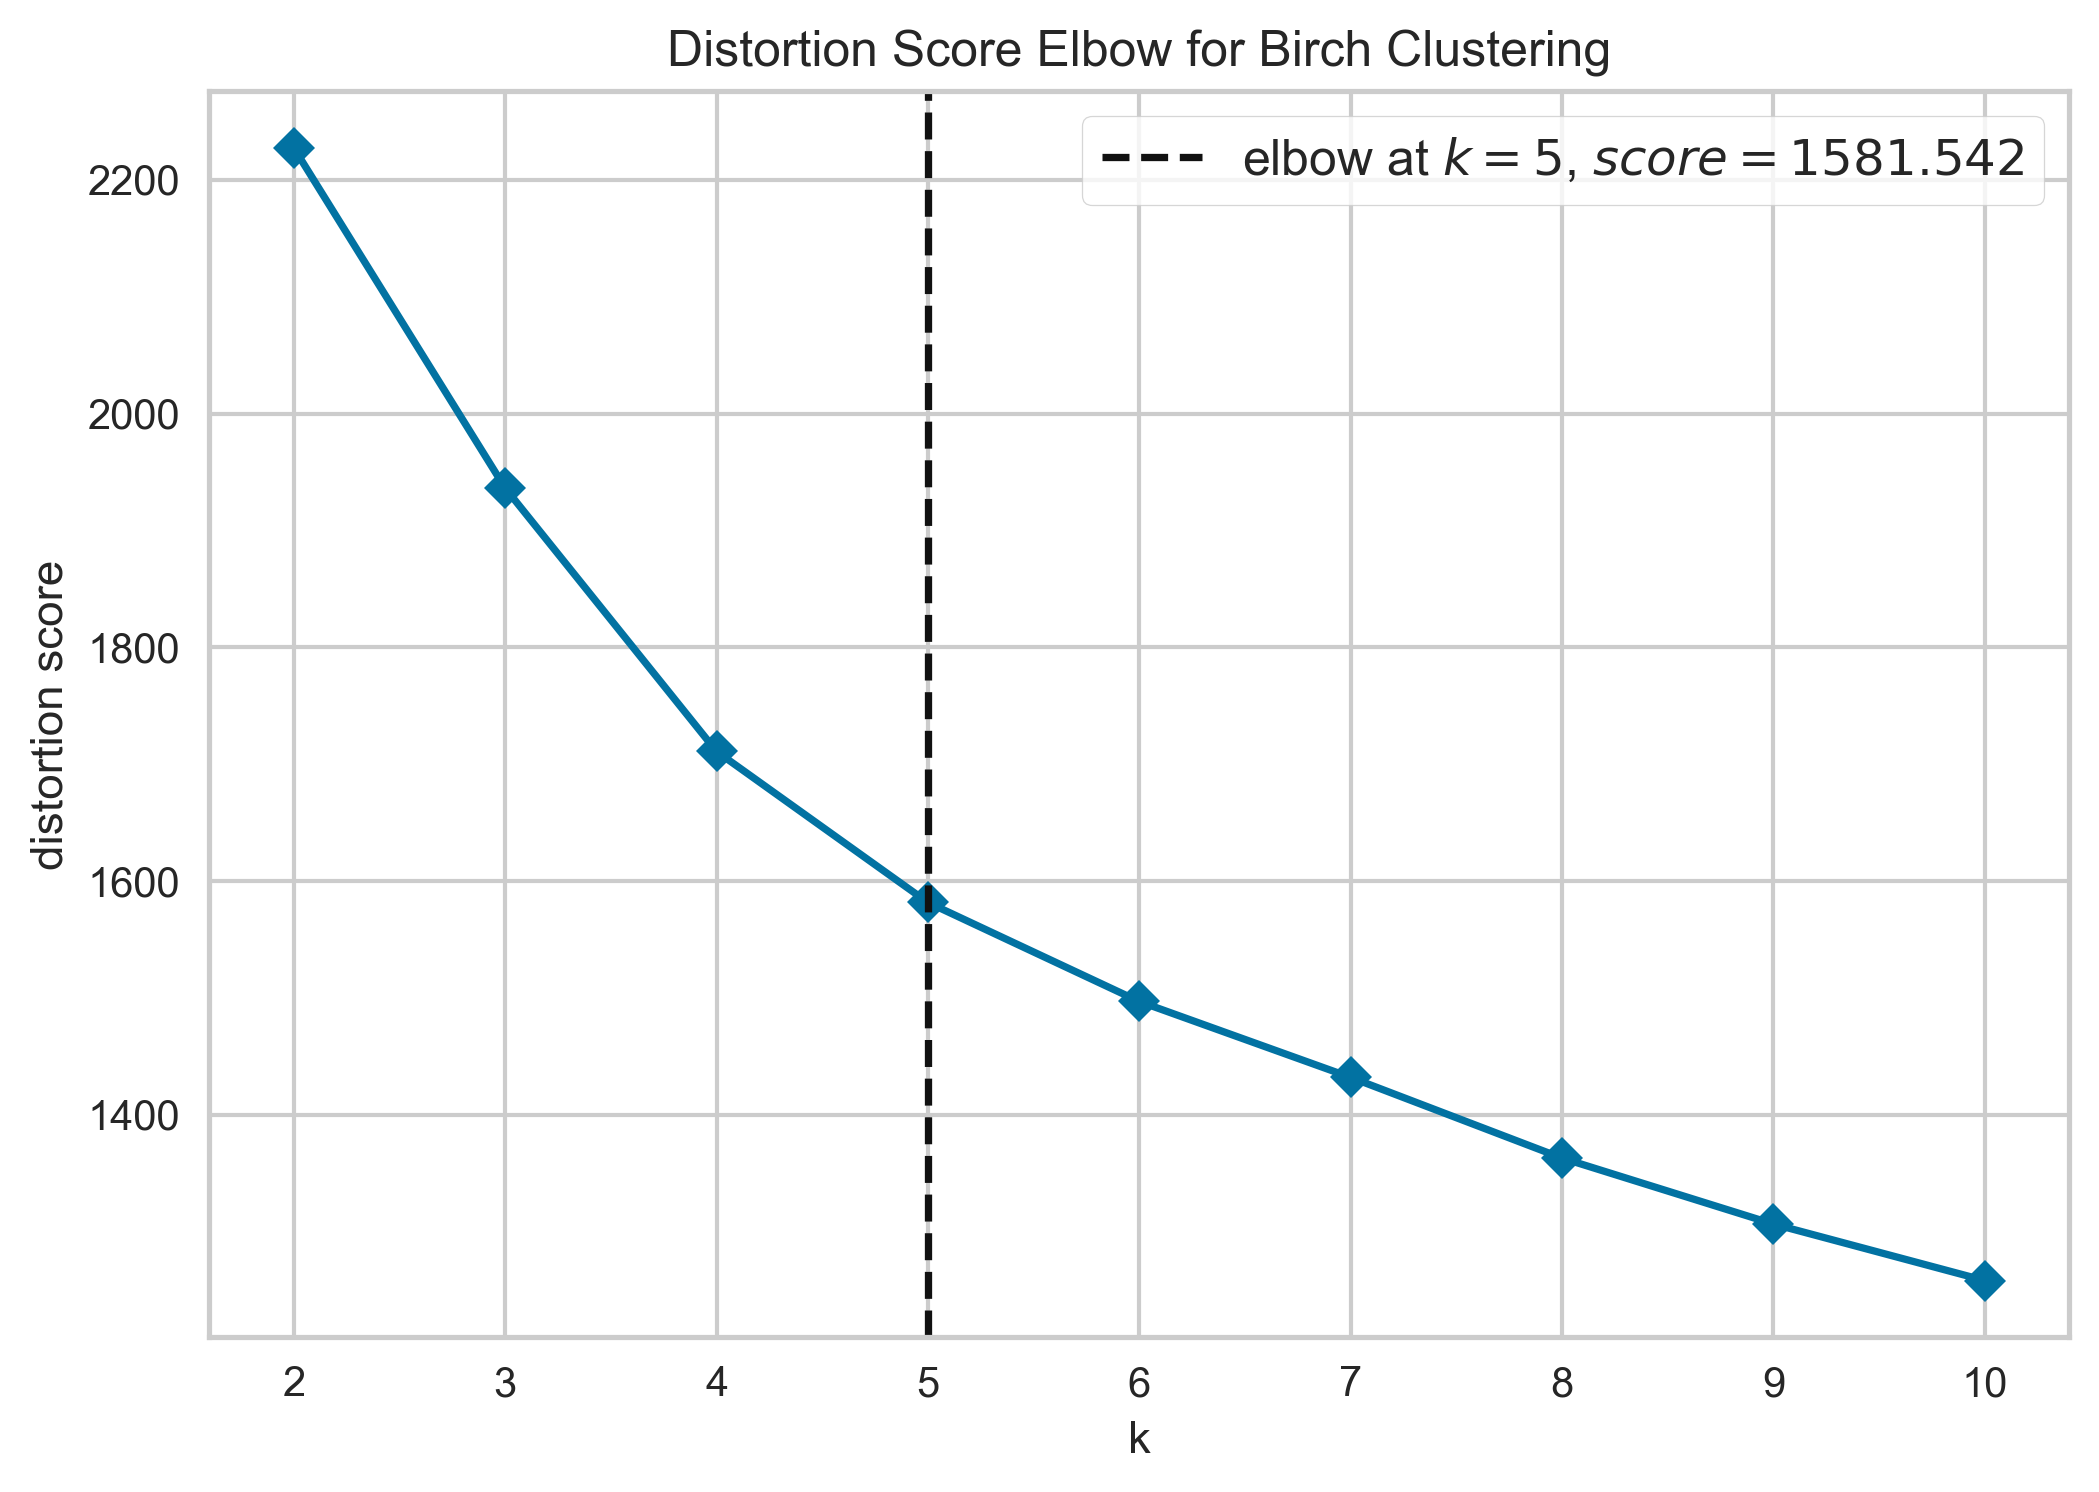

In [88]:
plot_model(model, 'elbow')

### Plotting the Model

### Finalizing and Saving the Model